# Repaso de la función apply

Repasemos el uso de la función apply, aplica una función a toda una columna,
esta función puede ser una transformación de los datos, desde pasar de string 
a float o hacer operaciones con la columna.

Sintaxis:
```python 
table().apply(funcion, nombre_columna)
```

Veamos un ejemplo: 


Supongamos que tenemos una tabla con las columnas: `Tiempo` y `concentracion_celulas`, asociadas a un modelo 
de crecimiento de celulas, en las cuales, cada uno de los valores son variables tipo string


In [33]:
import numpy as np
from  datascience import *
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings

# Predicciones


¿Podemos predecir qué tan alto crecerá un niño basándonos en la altura de sus padres?


Para hacer esto, utilizaremos el famoso conjunto de datos de altura de Galton, que se recopiló para demostrar la conexión entre la altura de los padres y la altura de sus hijos.

Referencias: https://inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html

In [34]:
altura = Table().read_table("family_heights.csv")
altura.labels

('family', 'father', 'mother', 'child', 'children', 'order', 'sex')

In [35]:
altura

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


Construyamos una funcion para travajar en centimetros

In [36]:
def pulgadas_to_cm(x):
    return x*2.54

In [37]:
altura = Table().read_table("family_heights.csv")
altura

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


In [38]:
altura = Table().read_table("family_heights.csv")
altura = altura.with_column("father",  altura.apply(pulgadas_to_cm, "father"))
altura = altura.with_column("mother",  altura.apply(pulgadas_to_cm, "mother"))
altura = altura.with_column("child",  altura.apply(pulgadas_to_cm, "child"))
altura = altura.with_column("AverageParents", 0.5*(altura.column("father")+altura.column("mother")) )

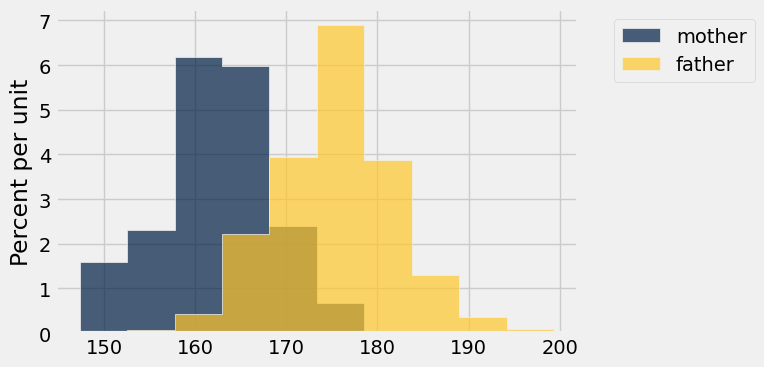

In [39]:
altura.hist("mother", "father")

In [40]:
alt = altura.select("AverageParents", "child")

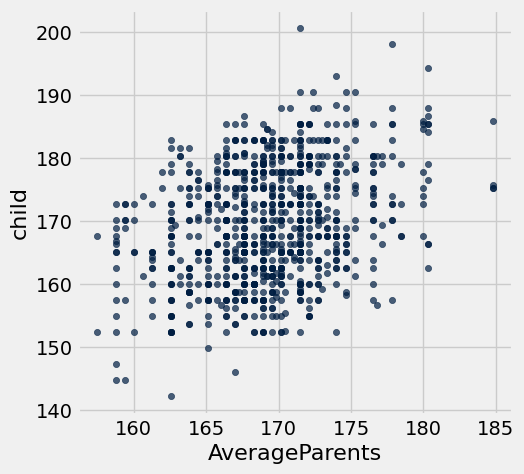

In [41]:
alt.scatter("AverageParents", "child")

Dada una altura de un padre, alrededor de 170cm, ¿cuál es la atura de los hijos?

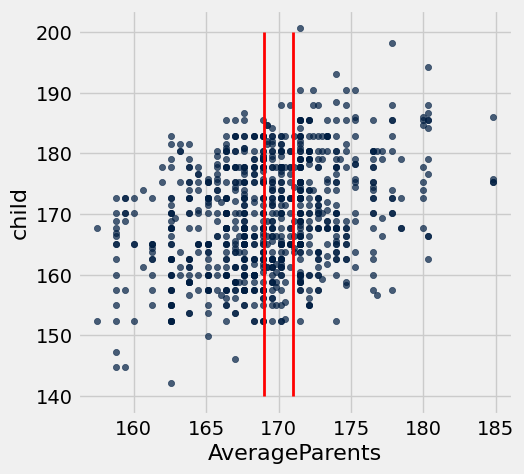

In [42]:
alt.scatter("AverageParents", "child")
plt.vlines(169, ymin=140, ymax=200, color="red", linewidth=2)
plt.vlines(171, ymin=140, ymax=200, color="red", linewidth=2)

In [43]:
cercana_170 = alt.where("AverageParents",are.between(169, 171))
np.mean(cercana_170.column("child"))

169.76540645161293

Altura promedio de un niño de padres que tiene una altura promedio, comprendida entre 169cm y 171cm

# Operación `Group`

In [44]:
def prediccion(padre_average):    
    puntos_cercanos = alt.where("AverageParents",are.between(padre_average-1, padre_average+1))
    return np.mean(puntos_cercanos.column("child"))

alt = alt.sort("AverageParents")

In [45]:
alt

AverageParents,child
157.48,167.64
157.48,152.4
158.75,172.72
158.75,170.18
158.75,168.91
158.75,167.64
158.75,166.878
158.75,166.37
158.75,165.1
158.75,165.1


In [46]:
prediccion_altura = Table().with_column("Prediccion",alt.apply(prediccion,"AverageParents") )
prediccion_altura

Prediccion
160.02
160.02
162.699
162.699
162.699
162.699
162.699
162.699
162.699
162.699


In [47]:
prediccion_altura = prediccion_altura.with_column("AverageParents",alt.column("AverageParents")) 
prediccion_altura

Prediccion,AverageParents
160.02,157.48
160.02,157.48
162.699,158.75
162.699,158.75
162.699,158.75
162.699,158.75
162.699,158.75
162.699,158.75
162.699,158.75
162.699,158.75


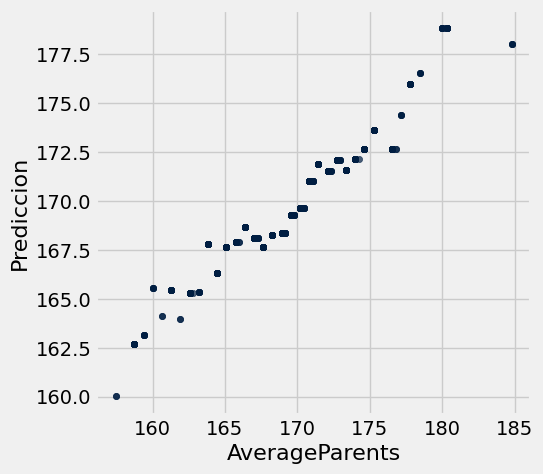

In [48]:
prediccion_altura.scatter("AverageParents","Prediccion")

Text(0, 0.5, 'Predicción')

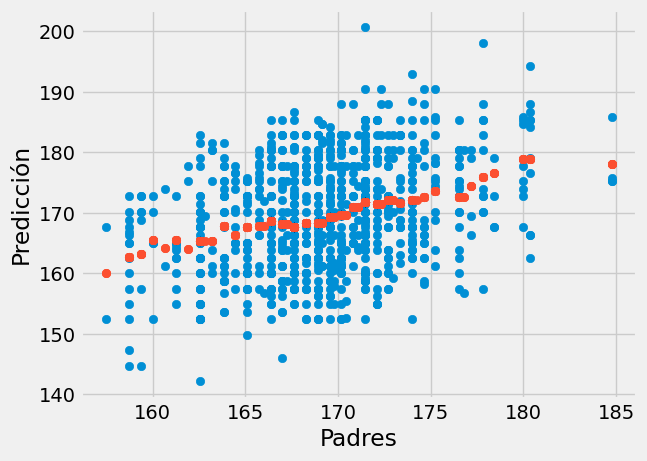

In [49]:
plt.figure()
plt.scatter(alt.column("AverageParents"),alt.column("child"))
plt.scatter(prediccion_altura.column("AverageParents"),prediccion_altura.column("Prediccion"))
plt.xlabel("Padres")
plt.ylabel("Predicción")

----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------

# Operacion Group y pivot

Construyamos un modelo, con esta primera intuición

In [55]:
# Crear la tabla
satisfaccion = Table().with_columns(
    'Individuo', make_array('Persona 1', 'Persona 2', 'Persona 3', 'Persona 4', 'Persona 5', 'Persona 6', 'Persona 7', 'Persona 8'),
    'Practica Ejercicio', make_array('Sí', 'No', 'Sí', 'No', 'Sí', 'No', 'Sí', 'No'),
    'Satisfacción con la Vida (1-10)', make_array(8, 5, 7, 4, 9, 6, 7, 3),
    'Horas de Ejercicio por Semana', make_array(5, 0, 6, 0, 4, 0, 7, 0)
)

satisfaccion.show()


Individuo,Practica Ejercicio,Satisfacción con la Vida (1-10),Horas de Ejercicio por Semana
Persona 1,Sí,8,5
Persona 2,No,5,0
Persona 3,Sí,7,6
Persona 4,No,4,0
Persona 5,Sí,9,4
Persona 6,No,6,0
Persona 7,Sí,7,7
Persona 8,No,3,0


In [56]:
satisfaccion.group("Practica Ejercicio")

Practica Ejercicio,count
No,4
Sí,4


Otro ejemplo:

Supongamos que tenemos la siguiente tabla de libros clasicos: 

In [57]:
# Crear la tabla con 20 libros
libros = Table().with_columns(
    'Titulo', make_array(
        'Cien Años de Soledad', 'El Quijote', '1984', 'Orgullo y Prejuicio', 'Crimen y Castigo', 
        'El Principito', 'Don Juan Tenorio', 'Matar a un Ruiseñor', 'La Odisea', 'El Gran Gatsby',
        'Fahrenheit 451', 'La Metamorfosis', 'El Retrato de Dorian Gray', 'Hamlet', 'Macbeth',
        'La Ilíada', 'El Señor de los Anillos', 'Drácula', 'Los Miserables', 'La Divina Comedia'),
    
    'Autor', make_array(
        'Gabriel García Márquez', 'Miguel de Cervantes', 'George Orwell', 'Jane Austen', 'Fiódor Dostoyevski', 
        'Antoine de Saint-Exupéry', 'José Zorrilla', 'Harper Lee', 'Homero', 'F. Scott Fitzgerald', 
        'Ray Bradbury', 'Franz Kafka', 'Oscar Wilde', 'William Shakespeare', 'William Shakespeare',
        'Homero', 'J. R. R. Tolkien', 'Bram Stoker', 'Victor Hugo', 'Dante Alighieri'),
    
    'Genero', make_array(
        'Ficción', 'Clásico', 'Ciencia Ficción', 'Romance', 'Clásico', 
        'Ficción', 'Clásico', 'Ficción', 'Clásico', 'Ficción',
        'Ciencia Ficción', 'Ficción', 'Clásico', 'Clásico', 'Clásico',
        'Clásico', 'Fantasía', 'Terror', 'Clásico', 'Clásico'),
    
    'Precio (COP)', make_array(
        45000, 60000, 40000, 38000, 52000, 
        35000, 30000, 45000, 32000, 42000,
        37000, 25000, 48000, 51000, 50000,
        30000, 70000, 35000, 68000, 63000),
    
    'Anio de Publicacion', make_array(
        1967, 1605, 1949, 1813, 1866,
        1943, 1844, 1960, 'Siglo VIII a.C.', 1925,
        1953, 1915, 1890, 1603, 1606,
        'Siglo VIII a.C.', 1954, 1897, 1862, 1320),
    
    'Calificacion (1-5)', make_array(
        4.8, 4.9, 4.7, 4.6, 4.8, 
        4.7, 4.4, 4.9, 4.6, 4.8,
        4.6, 4.5, 4.7, 4.9, 4.8,
        4.6, 4.9, 4.7, 4.9, 4.9)
)

In [58]:
libros

Titulo,Autor,Genero,Precio (COP),Anio de Publicacion,Calificacion (1-5)
Cien Años de Soledad,Gabriel García Márquez,Ficción,45000,1967,4.8
El Quijote,Miguel de Cervantes,Clásico,60000,1605,4.9
1984,George Orwell,Ciencia Ficción,40000,1949,4.7
Orgullo y Prejuicio,Jane Austen,Romance,38000,1813,4.6
Crimen y Castigo,Fiódor Dostoyevski,Clásico,52000,1866,4.8
El Principito,Antoine de Saint-Exupéry,Ficción,35000,1943,4.7
Don Juan Tenorio,José Zorrilla,Clásico,30000,1844,4.4
Matar a un Ruiseñor,Harper Lee,Ficción,45000,1960,4.9
La Odisea,Homero,Clásico,32000,Siglo VIII a.C.,4.6
El Gran Gatsby,F. Scott Fitzgerald,Ficción,42000,1925,4.8


In [59]:
libros.group("Genero", np.mean)

Genero,Titulo mean,Autor mean,Precio (COP) mean,Anio de Publicacion mean,Calificacion (1-5) mean
Ciencia Ficción,,,38500,,4.65
Clásico,,,48400,,4.75
Fantasía,,,70000,,4.9
Ficción,,,38400,,4.74
Romance,,,38000,,4.6
Terror,,,35000,,4.7


Veamos que tendriamos que hacer para hacer esa operacion

In [60]:
libros.where("Genero", are.equal_to("Clásico")).column("Precio (COP)").sum()

484000

# Pivots vs group

In [68]:
# Crear la tabla con más filas
tabla_frutas = Table().with_columns(
    'Fruta', np.array(['manzana', 'pera', 'manzana', 'fresa', 'pera', 'fresa', 
                       'banano', 'mango', 'kiwi', 'banano', 'mango', 'fresa', 
                       'kiwi', 'pera', 'banano', 'manzana', 'pera', 'fresa', 
                       'mango', 'manzana']),
    'Color', np.array(['rojo', 'verde', 'verde', 'rojo', 'verde', 'rojo', 
                       'verde', 'naranja', 'verde', 'amarillo', 'naranja', 'rojo', 
                       'verde', 'verde', 'amarillo', 'rojo', 'verde', 'rojo', 
                       'naranja', 'rojo']),
    'Precio', np.array([2500, 3500, 2500, 4000, 3500, 4000, 
                              1500, 3000, 4500, 1500, 3000, 4000, 
                              4500, 3500, 1500, 2500, 3500, 4000, 
                              3000, 2500])
)
tabla_frutas

Fruta,Color,Precio
manzana,rojo,2500
pera,verde,3500
manzana,verde,2500
fresa,rojo,4000
pera,verde,3500
fresa,rojo,4000
banano,verde,1500
mango,naranja,3000
kiwi,verde,4500
banano,amarillo,1500


In [67]:
tabla_frutas.group(["Color"], np.sum)

Color,Fruta sum,Precio sum
amarillo,,3000
naranja,,9000
rojo,,23500
verde,,27000


In [63]:
tabla_frutas.group(["Fruta"], np.sum)

Fruta,Color sum,Precio sum
banano,,4500
fresa,,16000
kiwi,,9000
mango,,9000
manzana,,10000
pera,,14000


In [64]:
tabla_frutas.group(["Color","Fruta"], np.sum)

Color,Fruta,Precio sum
amarillo,banano,3000
naranja,mango,9000
rojo,fresa,16000
rojo,manzana,7500
verde,banano,1500
verde,kiwi,9000
verde,manzana,2500
verde,pera,14000


In [65]:
tabla_frutas.pivot("Fruta", "Color")

Color,banano,fresa,kiwi,mango,manzana,pera
amarillo,2,0,0,0,0,0
naranja,0,0,0,3,0,0
rojo,0,4,0,0,3,0
verde,1,0,2,0,1,4
